# Projet 6 : Analysez les ventes d'une librairie

## Mission_3 : Analyse des données

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats

In [365]:
# import du fichier
df_final = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_final.csv')
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986
...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992


In [366]:
# changement de type de la variable "date"
df_final['date'] = pd.to_datetime(df_final['date'])
print(df_final.dtypes)

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                  int64
dtype: object


### Evolution du chiffre d'affaires dans le temps

In [367]:
print('La periode de vente est du', str(df_final['date'].min())[:10], 'au', str(df_final['date'].max())[:10]) # Dates de transaction la plus ancienne et la plus récente

La periode de vente est du 2021-03-01 au 2023-02-28


La periode des ventes s'étale sur deux ans, du 1er mars 2021 au 28 février 2023.

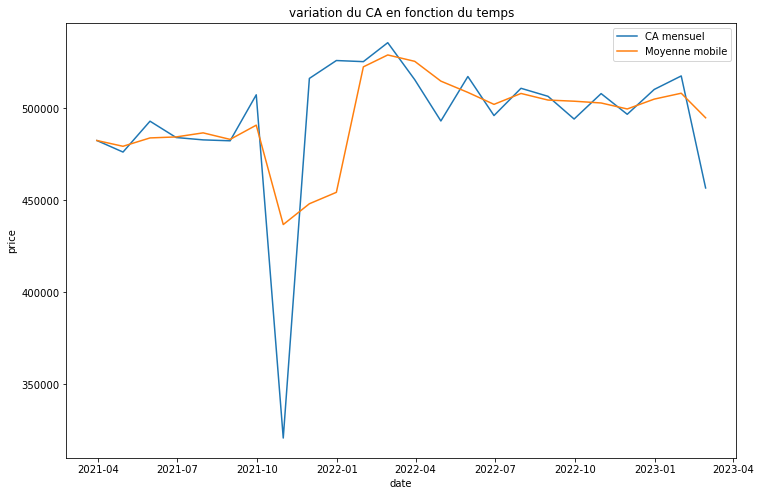

In [368]:
url_fig = 'C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/'

# Calul du chiffre d'affaires mensuel
df_CA_mensuel = df_final.resample('M', on='date')[["price"]].sum()

# Decomposition de la moyenne mobile sur 3 valeurs
Moyenne_mobile = df_CA_mensuel.rolling(3, min_periods=1).mean()

# representation graphique du chiffre d'affaire et la tendance globale
plt.figure(figsize=(12,8)) 
sns.lineplot(data=df_CA_mensuel, x="date", y="price", label = 'CA mensuel')
sns.lineplot(data=Moyenne_mobile, x="date", y="price", label = 'Moyenne mobile')
plt.title('variation du CA en fonction du temps')
plt.savefig(url_fig + 'variation du CA en fonction du temps.png', dpi=300, bbox_inches='tight')
plt.show()

Nous constatons une forte baisse du chiffre d'affaire du mois d'octobre 2021. Qu'est ce qui explique cette baisse du chiffre d'affaires ? Rupture de stock ? probléme de connexion des clients ? désinteressement des clients ?

Pour répondre à cette question nous allons regarder le volume des ventes par date et par categorie.

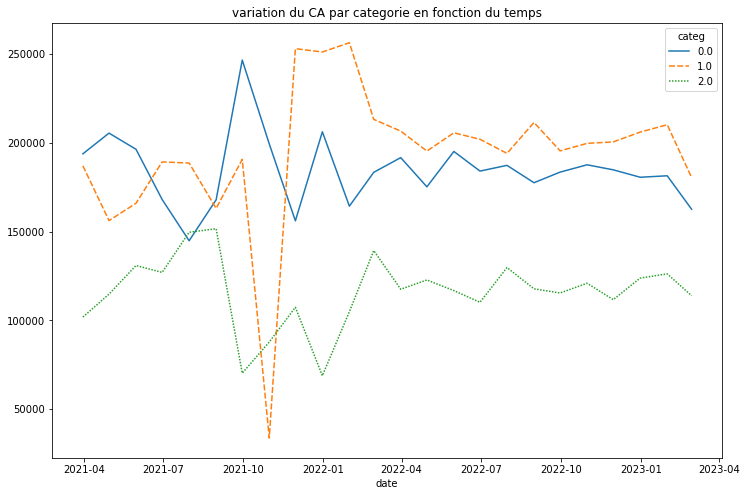

In [369]:
# Calul du chiffre d'affaires mensuel par categorie
df_CA_categorie = df_final.pivot_table(index='date', columns='categ', 
               values='price', aggfunc='sum').dropna(how='all').fillna(0).reset_index()
df_CA_categorie = df_CA_categorie.resample('M', on='date').sum()

# representation graphique du chiffre d'affaires par categorie
plt.figure(figsize=(12,8)) 
sns.lineplot(data=df_CA_categorie)
plt.title('variation du CA par categorie en fonction du temps')
plt.savefig(url_fig + 'variation du CA par categorie en fonction du temps.png', dpi=300, bbox_inches='tight')
plt.show()

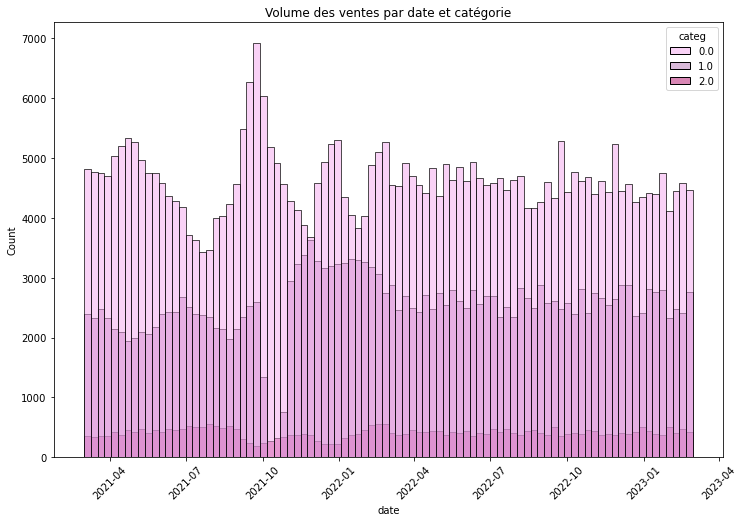

In [370]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_final, x='date', hue='categ', palette=["#f4a7ee","#b474b4", "#b5116d"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
plt.savefig(url_fig + 'Volume des ventes par date et catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

L'histogramme des dates par catégorie de produits montre qu'il manque des données de la categorie1 au mois d'octobre 2021 entrainant ainsi la forte baisse du chiffre d'affaires.

In [371]:
# Transactions du mois octobre, toutes catégories
transaction_octobre_2021 = df_final[(df_final['date']>='2021-10-01') & (df_final['date']<='2021-10-31')]

# Pourcentage des transactions du mois d'octobre 2021
print('les ventes du Mois d\'octobre 2021 represente ', round((len(transaction_octobre_2021) / len(df_final) * 100), 2), '% du dataset')


les ventes du Mois d'octobre 2021 represente  3.04 % du dataset


Pour équilibrer l'analyse on supprime toutes les données du mois d'octobre 2021, soit 3% du dataset.

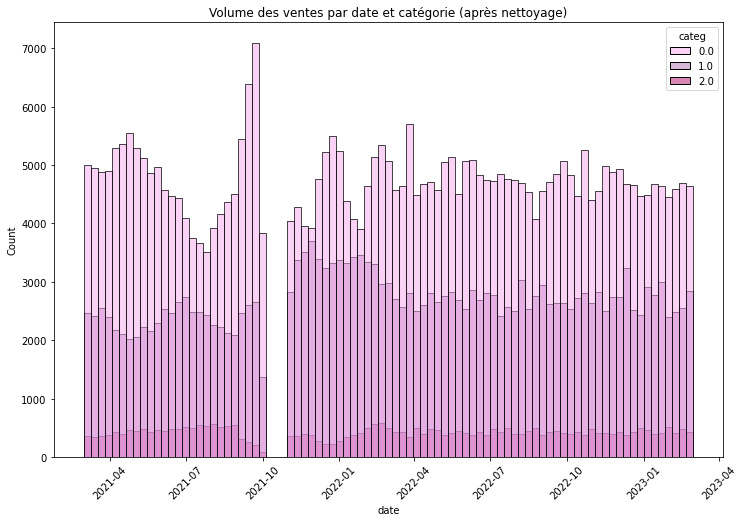

In [372]:
df_final.drop(transaction_octobre_2021.index, inplace=True) # Suppression des données du mois d'octobre 2021

# Volume des ventes par date et catégorie (sans le mois d\'octobre)
plt.figure(figsize=(12,8))
sns.histplot(data=df_final, x='date', hue='categ', palette=["#f4a7ee","#b474b4", "#b5116d"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie (après nettoyage)')
plt.savefig(url_fig + 'Volume des ventes par date et catégorie après nettoyage.png', dpi=300, bbox_inches='tight')
plt.show()

### Repartition du CA par categorie

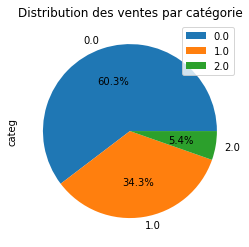

In [373]:
# distribution des ventes par catégorie
df_final['categ'].value_counts(normalize=True).plot(kind='pie',legend=True,autopct='%1.1f%%')
plt.title('Distribution des ventes par catégorie')
plt.savefig(url_fig + 'Distribution des ventes par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

La catégorie 0 représente 60% des ventes, la catégorie 2 et 1 seulement 5% et 34%. Malgré tout, nous remarquons que les catégories 1 et 2 ont une influence sur le chiffre d'affaires annuel.

Pour comprendre cette inégalité, regardons les statistiques des prix pour chaque catégorie

In [374]:
# Statistique des prix dans chaque catégorie
for i in sorted(df_final['categ'].unique()):
    print('Catégorie', i)
    print(pd.Series(df_final[df_final['categ']==i]['price'].describe()), '\n')

Catégorie 0.0
count    397466.000000
mean         10.639096
std           4.933481
min           0.620000
25%           6.290000
50%           9.990000
75%          14.450000
max          40.990000
Name: price, dtype: float64 

Catégorie 1.0
count    225845.000000
mean         20.488486
std           7.589324
min           2.000000
25%          15.810000
50%          19.080000
75%          24.980000
max          80.990000
Name: price, dtype: float64 

Catégorie 2.0
count    35353.000000
mean        76.251204
std         39.806807
min         30.990000
25%         53.990000
50%         62.830000
75%         73.720000
max        300.000000
Name: price, dtype: float64 



Nous remarquons que les categories 2 et 1 sont plus chéres que la categorie 0.

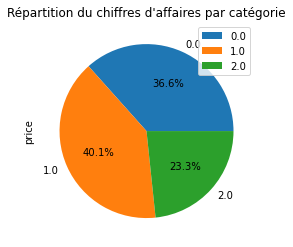

In [375]:
# répartition du Chiffre d'affaires par catégorie
data=df_final.pivot_table(index='categ', aggfunc={'price': np.sum}).plot(kind='pie', y='price',legend=True, autopct='%1.1f%%')
plt.title('Répartition du chiffres d\'affaires par catégorie')
plt.savefig(url_fig + 'Répartition du chiffres d\'affaires par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

Au final nous remarquons que la catégorie 0 malgrés un grand nombre de ventes (61%), ne représente qu'un tiers du chiffre d'affaires contrairement à la categorie 1 qui représente presque 40% duc chiffre d'affaires pour une volume de ventes de 33%.

Cette analyse nous permet de dire que le chiffre d'affaires est corrélé à la categorie de livre.

### Les tops

In [376]:
# Les 10 livres aux plus gros chiffres d'affaires annuels
df_final.pivot_table(index=['id_prod', 'categ'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index().head(10).rename(columns={'price': 'CA Total'})

,id_prod,categ,CA Total
0,2_159,2.0,92265.68
1,2_135,2.0,67472.22
2,2_112,2.0,62840.10
3,2_102,2.0,59080.86
4,2_209,2.0,55502.07
5,1_395,1.0,54095.34
6,1_369,1.0,53761.59
7,2_110,2.0,51916.50
8,1_414,1.0,51711.10
9,1_383,1.0,51225.33


Les 10 livres avec le plus gros chiffres d'affaires annuels appartiennent à la categorie 1 et 2.

In [377]:
# Les 10 livres aux plus gros nombre de ventes
df_final.pivot_table(index=['id_prod', 'categ'], values='price', aggfunc='count').sort_values(by='price', ascending=False).reset_index().head(10).rename(columns={'price': 'nbre ventes Total'})

,id_prod,categ,nbre ventes Total
0,1_369,1.0,2241
1,1_417,1.0,2174
2,1_414,1.0,2170
3,1_498,1.0,2119
4,1_425,1.0,2087
5,1_403,1.0,1952
6,1_412,1.0,1942
7,1_406,1.0,1934
8,1_413,1.0,1933
9,1_407,1.0,1925


Les 10 livres avec le plus gros nombre de ventes appartiennent à la categorie 1.

### Les flops

In [378]:
# Les 10 livres aux plus bas chiffres d'affaires annuels
df_final.pivot_table(index=['id_prod', 'categ'], aggfunc={'price': np.sum}).sort_values(by=['price', 'id_prod'], ascending=True).reset_index().head(10)

,id_prod,categ,price
0,0_1539,0.0,0.99
1,0_898,0.0,1.27
2,0_1284,0.0,1.38
3,0_1653,0.0,1.98
4,0_643,0.0,1.98
5,0_1601,0.0,1.99
6,0_541,0.0,1.99
7,0_807,0.0,1.99
8,0_1728,0.0,2.27
9,0_324,0.0,2.36


### La périodicité des ventes par catégorie

Catégorie 0.0


<Figure size 720x360 with 0 Axes>

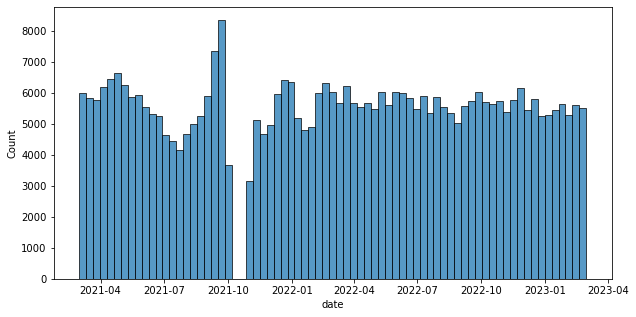

Catégorie 1.0


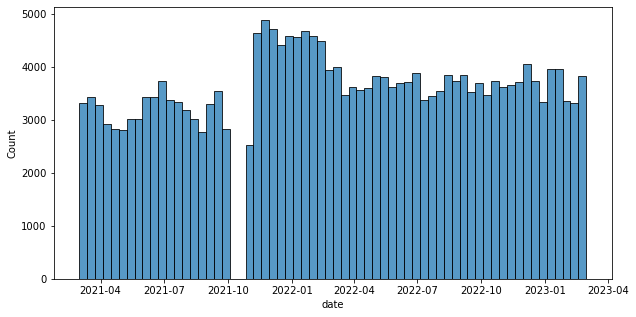

Catégorie 2.0


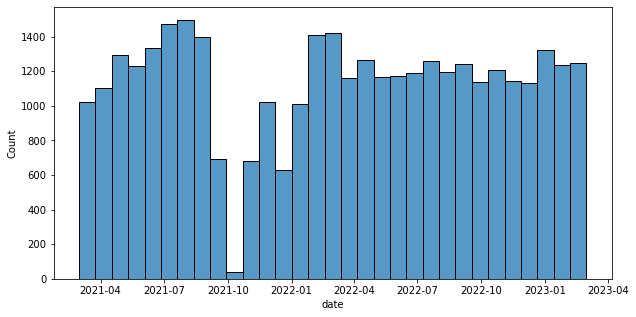

In [379]:
plt.figure(figsize=(10,5))
for i in sorted(df_final['categ'].unique()):
    print('Catégorie', i)
    plt.figure(figsize=(10,5))
    sns.histplot(data=df_final[df_final['categ']==i], x='date')
    plt.show()

On remarque que la périodicité des ventes apparaît corrélée à la catégorie :
- La catégorie 0 : meilleurs vente (Sept-Ocotbre) correspond à la rentrée scolaire de septembre
- La catégorie 1 : meilleurs vente (Dec-Janvier) correspond à la periode des fêtes de fin d'année
- La catégorie 2 : meilleurs vente (Juillet-aout) pendant l'été et au mois de février (début du second semestre universitaire)

### Etude de profil des clients

Pour faciliter notre l'analyse, on crée quelques variables additionnelles dans le dataset:

- Le mois de la transaction
- La frequence d'achats mensuelle par client
- Le nombre de ventes total par client sur les 2 années
- Le panier moyen
- La taille du panier moyen pour chaque client
- Le chiffre d'affaires total par client sur les 2 années

In [380]:
# Mois de la transaction
df_final['mois'] = pd.DatetimeIndex(df_final['date']).month 

df_final['date_fixe'] = df_final['date'].dt.date # Variable temporaire de date fixe (jour)

# Total des ventes par client sur les 2 années
df_total_ventes = df_final.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'})
df_final = df_final.merge(df_total_ventes,how='left', on='client_id')

# Ventes Mensuelles
df_final['ventes_mensuelles'] = round(df_final['total_ventes'] / 23)

# taille du panier moyen par client
df_taille_panier_moyen = df_final.pivot_table(index=['client_id', 'date_fixe'], values='price', aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(columns={'price': 'taille_panier_moyen'})
df_final = df_final.merge(df_taille_panier_moyen,how='left', on='client_id')

# prix du panier moyen par client
df_panier_moyen =df_final.pivot_table(index=['client_id', 'date_fixe'], values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(columns={'price': 'panier_moyen'})
df_final = df_final.merge(df_panier_moyen,how='left', on='client_id')

# chiffres d'affaires total par client sur les 2 années
df_total_achats = df_final.pivot_table(index='client_id', values='price', aggfunc='sum').reset_index().rename(columns={'price': 'total_achats'})
df_final = df_final.merge(df_total_achats,how='left', on='client_id')
df_final



,id_prod,date,session_id,client_id,price,categ,sex,birth,mois,date_fixe,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,5,2022-05-20,181,8.0,2.479452,11.978051,2118.62
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,7,2021-07-20,181,8.0,2.479452,11.978051,2118.62
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,8,2022-08-20,181,8.0,2.479452,11.978051,2118.62
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,6,2022-06-18,181,8.0,2.479452,11.978051,2118.62
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,8,2021-08-18,181,8.0,2.479452,11.978051,2118.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658659,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,7,2021-07-23,2,0.0,1.000000,181.990000,363.98
658660,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,3,2022-03-25,2,0.0,1.000000,19.850000,39.70
658661,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,9,2021-09-25,2,0.0,1.000000,19.850000,39.70
658662,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,3,2021-03-11,2,0.0,1.000000,100.990000,201.98


#### Les differents types de client

In [381]:
# Les 10 clients aux plus gros chiffres d'affaires annuels
df_ca_annuel_client = df_final.pivot_table(
    index='client_id', values=['total_achats','ventes_mensuelles','taille_panier_moyen','total_ventes','panier_moyen']
    ).sort_values(by='total_achats', ascending=False).reset_index()

df_ca_annuel_client.head(10) 

,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.770388,34.991429,313044.92,24494,1065.0
1,c_4958,55.461723,7.321839,282959.96,5096,222.0
2,c_6714,16.855326,13.195556,149938.74,8907,387.0
3,c_3454,16.680603,9.487143,111903.05,6641,289.0
4,c_2899,55.754703,1.640625,5214.05,105,5.0
5,c_1570,14.958710,2.679104,5166.45,359,16.0
6,c_3263,13.237727,3.015385,5129.89,392,17.0
7,c_7319,13.472283,2.746269,5120.55,368,16.0
8,c_5263,58.905308,1.507692,5006.85,98,4.0
9,c_8026,13.747661,2.830769,4980.04,368,16.0


Nous constatons 4 clients qui se détachent du lot. Leur nombre d'achats est largement plus élevé que celui des autres clients : on a sûrement affaire à des clients VIP.

Nous allons regarder la répartition du chiffre d'affaires entre ces différents clients

#### La répartition des ventes et chiffre d'affaires entre clients

C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


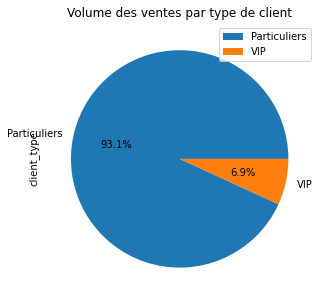

Clients VIP : 7.43 % du chiffre d'affaires total
Clients particuliers : 92.57 % du chiffre d'affaires total


In [382]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
df_final['client_type'] = 'Particuliers'
df_final['client_type'].loc[df_final[df_final['client_id'].isin(df_ca_annuel_client.head(4)['client_id'])].index] = 'VIP'

# Création de 2 datasets
df_clients_VIP = df_final[df_final['client_type']=='VIP']
df_client_part = df_final[df_final['client_type']=='Particuliers']

# Proportion des transactions entre les clients
plt.figure(figsize=(5,5))
df_final['client_type'].value_counts(normalize=True).plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title('Volume des ventes par type de client')
plt.savefig(url_fig + 'Volume des ventes par type de client.png', dpi=300, bbox_inches='tight')
plt.show()

print('Clients VIP :',round(df_clients_VIP['price'].sum() / df_final['price'].sum() * 100, 2), '% du chiffre d\'affaires total')
print('Clients particuliers :',round(df_client_part['price'].sum() / df_final['price'].sum() * 100, 2), '% du chiffre d\'affaires total')

Les clients VIP représentent 7.43% du chiffre d'affaires, et 6.9% des ventes.

#### La répartition du chiffre d'affaires entre clients avec une courbe de Lorenz

Incide de Gini : 0.4471875809776391


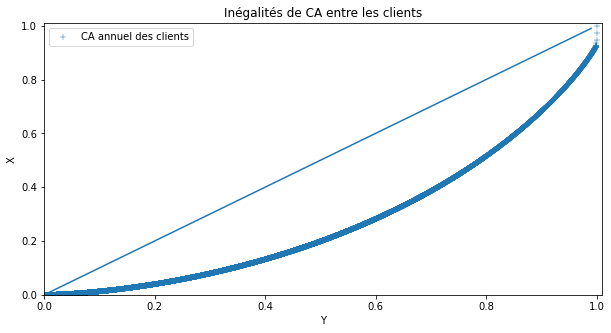

<Figure size 432x288 with 0 Axes>

In [417]:
# Courbe de Lorenz
plt.figure(figsize=(10,5))
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    
        # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='+', palette="deep", label='CA annuel des clients')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1.01])
    plt.ylim([0,1.01])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires de tous les clients
lorenz(df_ca_annuel_client['total_achats'], 'Inégalités de CA entre les clients')
plt.savefig(url_fig + 'Inégalités de CA entre les clients.png', dpi=300, bbox_inches='tight')

La courbe de Lorenz montre encore une fois le chiffre d'affaires que les 4 clients (représentés par des croix) sort du lot.

Incide de Gini : 0.40352359522423


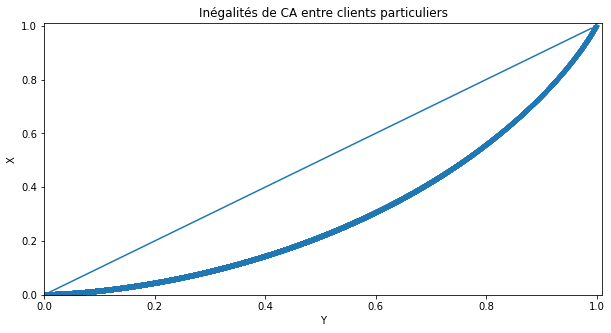

<Figure size 432x288 with 0 Axes>

In [384]:
# l'indice de Gini sans les clients VIP
plt.figure(figsize=(10,5))
lorenz(df_client_part.pivot_table(index='client_id')['total_achats'], 'Inégalités de CA entre clients particuliers')
plt.savefig(url_fig + 'Inégalités de CA entre clients particuliers.png', dpi=300, bbox_inches='tight')

L'indice de Gini nous montre l'inégalité des chiffres d'affaires de tous les clients. 

Indice de Gini : chiffre de 0 à 1 mesurant l'aire entre la bissectrice et la courbe de Lorenz. 

Ici nous remarquons que l'indice de Gini est plus faible si on exclut du dataset les 4 clients VIP ce qui reduit l'inégalité du chiffre d'affaires entre les clients

#### Zoom sur les clients VIP

In [385]:
# Profil des clients VIP
df_clients_VIP.pivot_table(index=['client_id', 'sex']).reset_index()

,client_id,sex,birth,categ,mois,panier_moyen,price,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,m,1980,0.216584,6.459541,12.770388,12.780474,34.991429,313044.92,24494,1065.0
1,c_3454,m,1969,0.612860,6.405812,16.680603,16.850331,9.487143,111903.05,6641,289.0
2,c_4958,m,1999,1.630887,6.331633,55.461723,55.525895,7.321839,282959.96,5096,222.0
3,c_6714,f,1968,0.463231,6.388908,16.855326,16.833809,13.195556,149938.74,8907,387.0


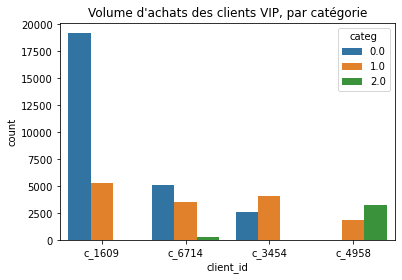

In [386]:
# distribution des volume des ventes des clients VIP par categorie
sns.countplot(data=df_clients_VIP, x='client_id', hue='categ')
plt.title('Volume d\'achats des clients VIP, par catégorie')
plt.savefig(url_fig + 'Volume d\'achats des clients VIP, par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

Le client c_4958 est le  principal consommateur de la categorie 2 contrairement au client c_1609 qui n'en consomme pas.
Vu que le client c_4958 détient le plus gros panier moyen (56 euros) avec une frequence d'achats la plus faible, on peut emettre l'hypothése que la catégorie pourrait influer sur le prix du livre.

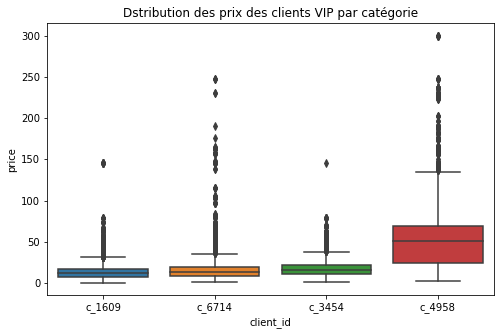

In [387]:
# distribution des prix d'achat des clients VIP par categorie
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clients_VIP, y='price', x='client_id', showfliers=True)
plt.title('Dstribution des prix des clients VIP par catégorie')
plt.savefig(url_fig + 'Dstribution des prix des clients VIP par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

La distribution des prix d'achats confirme notre hypothése : le client c_4958 achète des livres plus chers que les 3 autres clients.

### Lien existant entre le genre et la categorie de livre achetée

In [388]:
year = datetime.now().year # Année courante
df_final['age'] = year - df_final['birth'] # Âge du client


# Tranches d'âge
df_final['classe_age'] = '18-30'
df_final['classe_age'].loc[df_final[df_final['age']>=30].index] = '30-40'
df_final['classe_age'].loc[df_final[df_final['age']>=40].index] = '40-50'
df_final['classe_age'].loc[df_final[df_final['age']>=50].index] = '50-60'
df_final['classe_age'].loc[df_final[df_final['age']>=60].index] = '60-70'
df_final['classe_age'].loc[df_final[df_final['age']>=70].index] = '70-80'
df_final['classe_age'].loc[df_final[df_final['age']>=80].index] = '80 et +'


C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [389]:
df_final

,id_prod,date,session_id,client_id,price,categ,sex,birth,mois,date_fixe,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type,age,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,5,2022-05-20,181,8.0,2.479452,11.978051,2118.62,Particuliers,36,30-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,f,1986,7,2021-07-20,181,8.0,2.479452,11.978051,2118.62,Particuliers,36,30-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,f,1986,8,2022-08-20,181,8.0,2.479452,11.978051,2118.62,Particuliers,36,30-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,f,1986,6,2022-06-18,181,8.0,2.479452,11.978051,2118.62,Particuliers,36,30-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,f,1986,8,2021-08-18,181,8.0,2.479452,11.978051,2118.62,Particuliers,36,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658659,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,f,2001,7,2021-07-23,2,0.0,1.000000,181.990000,363.98,Particuliers,21,18-30
658660,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,f,1960,3,2022-03-25,2,0.0,1.000000,19.850000,39.70,Particuliers,62,60-70
658661,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,f,1960,9,2021-09-25,2,0.0,1.000000,19.850000,39.70,Particuliers,62,60-70
658662,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,m,1992,3,2021-03-11,2,0.0,1.000000,100.990000,201.98,Particuliers,30,30-40


#### Proportions d'hommes et de femmes du dataset

Text(0.5, 1.0, 'Femmes')

<Figure size 1080x720 with 0 Axes>

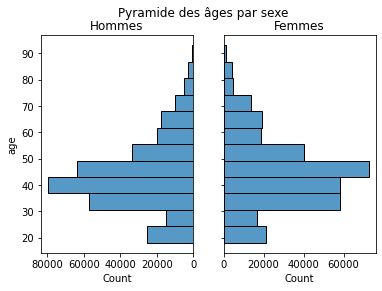

In [390]:
# Pyramide des âges par sexe
plt.figure(figsize=(15,10))
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

sns.histplot(ax=axes[0], y=df_final[df_final['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_final[df_final['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

les 2 histogrammes montrent les memes proportions d'hommes et de femmes en fonction des ages.

#### Periodicité des ventes en fonction du sexe

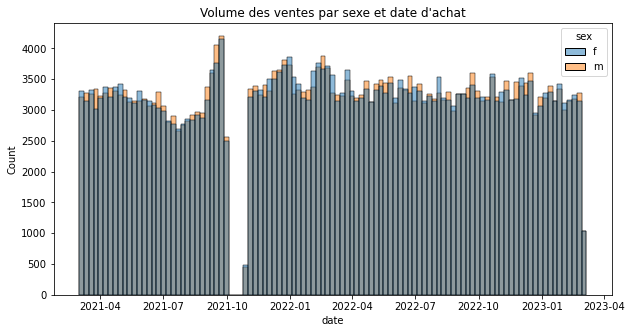

In [391]:
# Volume des ventes par sexe et date d'achat
plt.figure(figsize=(10,5))
sns.histplot(data=df_final, x='date', hue='sex', binwidth=7)
plt.title('Volume des ventes par sexe et date d\'achat')
plt.savefig(url_fig + 'Volume des ventes par sexe et date d\'achat.png', dpi=300, bbox_inches='tight')
plt.show()

La périodicité des ventes est la même pour les 2 sexes.

#### Lien entre "sex" et volume de ventes par categorie

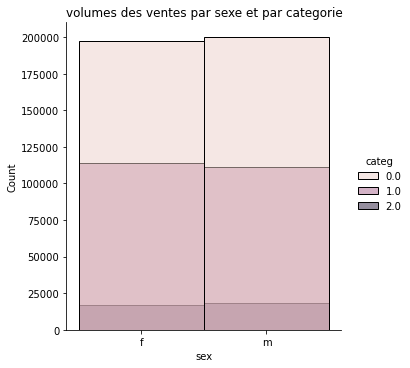

In [392]:
# lien entre "sex" et volume de vente par "categorie"
sns.displot(data=df_final, x='sex', hue='categ')
plt.title('volumes des ventes par sexe et par categorie')
plt.savefig(url_fig + 'volumes des ventes par sexe et par categorie.png', dpi=300, bbox_inches='tight')
plt.show()

In [414]:
# Table de contingence
tab_contigence = pd.crosstab(df_final['categ'], df_final['sex'], margins=True,  margins_name="total")
print( "Table de contingence", '\n', tab_contigence, '\n')


print("La répartition des ventes entre les hommes et les femmes est de :", '\n',
      round(pd.crosstab(df_final.categ, df_final.sex, normalize = "index")*100,2))

Table de contingence 
 sex         f       m   total
categ                        
0.0    197385  200081  397466
1.0    114258  111587  225845
2.0     16746   18607   35353
total  328389  330275  658664 

La répartition des ventes entre les hommes et les femmes est de : 
 sex        f      m
categ              
0.0    49.66  50.34
1.0    50.59  49.41
2.0    47.37  52.63


Nous constatons une différence entre les volumes de ventes chez les hommes et les femmes surtout pour la catégorie 2 (environ 5%) qui est la catégorie la plus chére

### Lien entre l'age des clients et la categorie de livre achetée

#### Distribution des ventes par age et par catégorie

<Figure size 720x360 with 0 Axes>

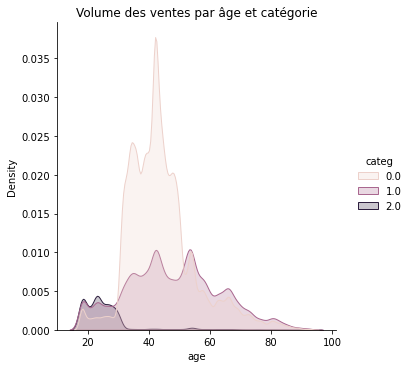

In [394]:
# Distribution des ventes par age et par catégorie
plt.figure(figsize=(10,5))
sns.displot(data=df_final, x='age', hue='categ', kind='kde', fill=True)
plt.title('Volume des ventes par âge et catégorie')
plt.savefig(url_fig + 'Volume des ventes par âge et catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

On remarque que la categorie des livre apparaît corrélée à l'age des clients :

- La catégorie 0 : principalement achetés par les clients entre 30-50 ans
- La catégorie 1 : consommée par toutes les classes d'age.
- La catégorie 2 : Consommée par les moins de 30 ans

#### Distribution des prix par classe d\'âge 

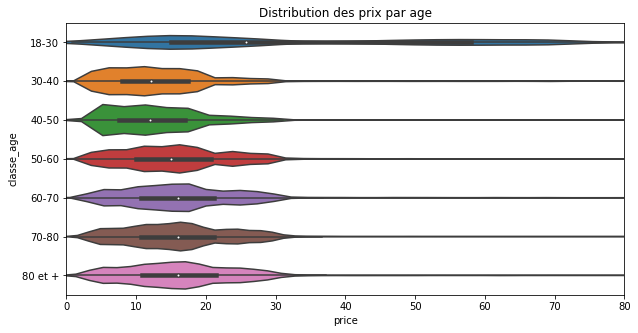

In [395]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_final.sort_values(by='classe_age'), x='price', y='classe_age', showfliers=False, showmeans=True)
plt.xlim([0,80])
plt.title('Distribution des prix par age')
plt.show()

Les moins de 30 ans affichent des prix d'achat bien plus elevés que les autres clients avec une densité d'achat plus faible. C'est la tranche d'age qui consomme majoritairement la categorie 2(clients consommant la categorie 2).
Les prix sont aussi légèrement inférieurs chez les 30-50 ans (population consommant majoritairment la catégorie 0).

In [396]:
df_clients_VIP = df_final[df_final['client_type']=='VIP']
# Profil des clients VIP
df_clients_VIP.pivot_table(index=['client_id', "sex"]).reset_index()

,client_id,sex,age,birth,categ,mois,panier_moyen,price,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,m,42,1980,0.216584,6.459541,12.770388,12.780474,34.991429,313044.92,24494,1065.0
1,c_3454,m,53,1969,0.612860,6.405812,16.680603,16.850331,9.487143,111903.05,6641,289.0
2,c_4958,m,23,1999,1.630887,6.331633,55.461723,55.525895,7.321839,282959.96,5096,222.0
3,c_6714,f,54,1968,0.463231,6.388908,16.855326,16.833809,13.195556,149938.74,8907,387.0


Nous avons le meme constat chez les clients VIP avec le client c_4958 qui est le plus jeune (23 ans) et consommant majoritairement la categorie 2.

#### Distribution du total des achats par classe d'âge

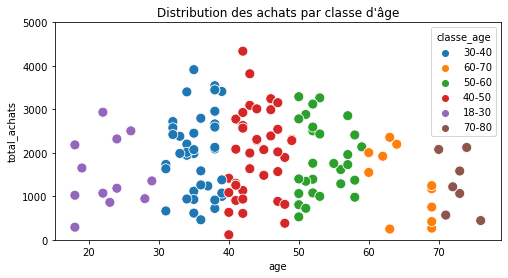

In [397]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_final.sample(150), x='age', y='total_achats', hue='classe_age', s=100)
plt.title('Distribution des achats par classe d\'âge')
plt.ylim([0,5000])
plt.show()

Les 30-50 ans concentrent ainsi les plus gros chiffres d'affaires, suivis par les moins de 30 ans.

Le chiffre d'affaires des clients particuliers est logiquement corrélé à la classe d'âge.

#### Fréquences des achats par âge

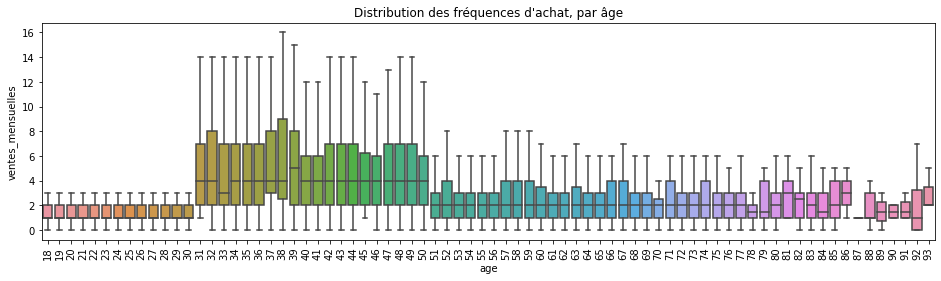

In [398]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df_final.pivot_table(index=['client_id']),
    y='ventes_mensuelles', x='age', showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution des fréquences d\'achat, par âge')
plt.savefig(url_fig + 'Distribution des fréquences d\'achat par âge.png', dpi=300, bbox_inches='tight')
plt.show()

La fréquence d'achats classe d'autant mieux les 3 groupes d'individus définis plus tôt :

- Les moins de 30 ans achètent le même nombre de livres (pas plus de 2 livres par mois)
- Les 30-50 ans se démarquent : la plus grande partie de ces clients achète plus de 6 livres par mois.
- Les plus de 50 ans ont des habitudes plus variées, mais achètent rarement plus de 5 livres

#### La taille du panier moyen par âge

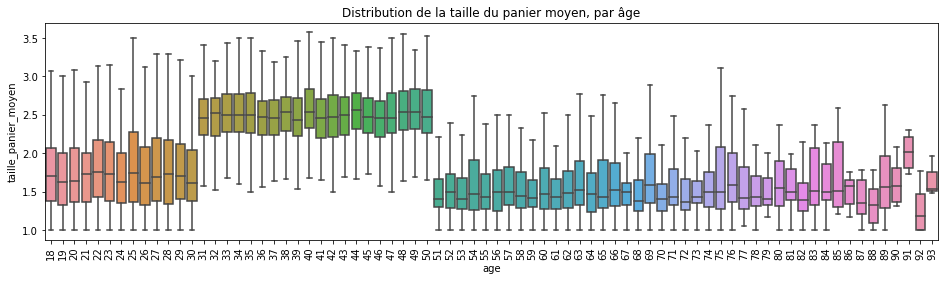

In [399]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df_final.pivot_table(index=['client_id']),
    y='taille_panier_moyen', x='age', showfliers=False, showmeans=False)
plt.xticks(rotation=90)
plt.title('Distribution de la taille du panier moyen, par âge')
plt.savefig(url_fig + 'Distribution de la taille du panier moyen par âge.png', dpi=300, bbox_inches='tight')
plt.show()

La taille du panier moyen suit la même logique que la fréquence des achats :

- Les moins de 30 ans comptent en moyenne moins de 2 livres par panier

- Les 30-50 ans achètent 2 à 3 livres par commande

- Les habitudes sont aléatoires chez les plus de 50 ans

<ipython-input-400-3b52a14e941d>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(df_final.corr(), dtype=np.bool)),


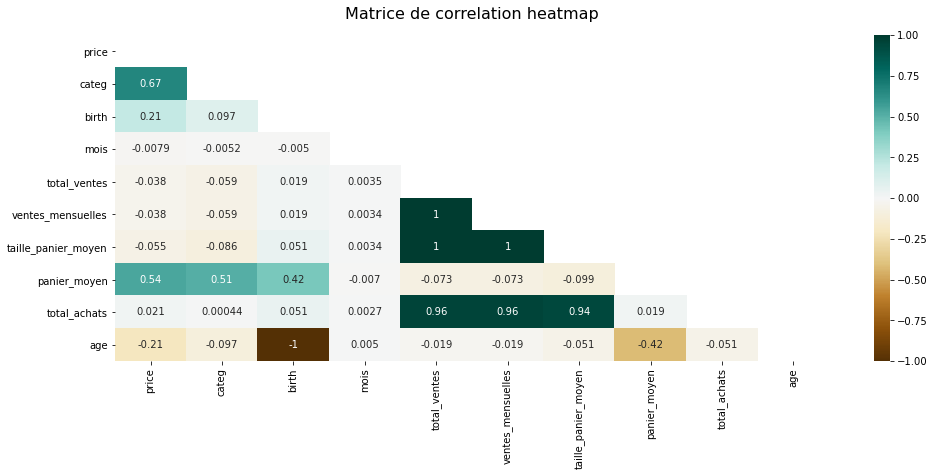

In [400]:
# encodage de la variable "sex"
#df_final = pd.concat([df_client_part,
                #pd.get_dummies(df_final['sex'], drop_first=True).rename(columns={'m': 'sex_code'})],axis=1)

# Matrice de corrélation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    df_final.corr(), 
    mask=np.triu(np.ones_like(df_final.corr(), dtype=np.bool)), 
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Matrice de correlation heatmap', fontdict={'fontsize':16}, pad=16)
plt.show()

In [401]:
df_clients_VIP.to_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_clients_VIP.csv', index=False)
df_client_part.to_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_client_part.csv', index=False)
df_final.to_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P6/DAN-P6-donnees/df_final_1.csv', index=False)